# Volatility prediction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
close_df = pd.read_csv('../../db/data/merge/primary/closes.csv', index_col=0)
high_df = pd.read_csv('../../db/data/merge/primary/highs.csv', index_col=0)
low_df = pd.read_csv('../../db/data/merge/primary/lows.csv', index_col=0)
close_df.shape, high_df.shape, low_df.shape

((111096, 28), (111096, 28), (111096, 28))

In [4]:
def ema(df: pd.Series, window: int):
    return df.ewm(alpha=1/window, adjust=False).mean()

In [5]:
def atr(close: pd.DataFrame, low: pd.DataFrame, high: pd.DataFrame, window:int=14):
    data = pd.DataFrame([])
    ccy_pairs = close.columns
    for pair in ccy_pairs:
        data[f'close_{pair}'] = close[pair]
        data[f'high_{pair}'] = high[pair]
        data[f'low_{pair}'] = low[pair]
        data[f'tr0_{pair}'] = data[f'high_{pair}'] - data[f'low_{pair}']
        data[f'tr1_{pair}'] = np.abs(data[f'high_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr2_{pair}'] = np.abs(data[f'low_{pair}'] - data[f'close_{pair}'].shift())
        data[f'tr_{pair}'] = data[[f'tr0_{pair}', f'tr1_{pair}', f'tr2_{pair}']].max(axis=1)
        data[f'atr_{pair}'] = ema(data[f'tr_{pair}'], window)
    data.dropna(inplace=True)
    return data

In [6]:
df = atr(close_df.iloc[:5000], low_df.iloc[:5000], high_df.iloc[:5000])
df

,close_AUD_CAD,high_AUD_CAD,low_AUD_CAD,tr0_AUD_CAD,tr1_AUD_CAD,tr2_AUD_CAD,tr_AUD_CAD,atr_AUD_CAD,close_AUD_CHF,high_AUD_CHF,...,tr_USD_CHF,atr_USD_CHF,close_USD_JPY,high_USD_JPY,low_USD_JPY,tr0_USD_JPY,tr1_USD_JPY,tr2_USD_JPY,tr_USD_JPY,atr_USD_JPY
2005-01-03 01:00:00+00:00,0.94074,0.94198,0.94002,0.00196,0.00182,0.00014,0.00196,0.001858,0.89274,0.89417,...,0.00295,0.003461,102.385,102.545,102.365,0.180,0.025,0.155,0.180,0.235714
2005-01-03 02:00:00+00:00,0.93862,0.94074,0.93862,0.00212,0.00000,0.00212,0.00212,0.001877,0.89338,0.89409,...,0.00420,0.003514,102.365,102.475,102.365,0.110,0.090,0.020,0.110,0.226735
2005-01-03 03:00:00+00:00,0.93520,0.93896,0.93274,0.00622,0.00034,0.00588,0.00622,0.002187,0.89278,0.89449,...,0.00990,0.003970,103.245,103.465,102.375,1.090,1.100,0.010,1.100,0.289111
2005-01-03 04:00:00+00:00,0.93502,0.93756,0.93370,0.00386,0.00236,0.00150,0.00386,0.002306,0.89083,0.89437,...,0.00345,0.003933,103.140,103.305,102.995,0.310,0.060,0.250,0.310,0.290603
2005-01-03 05:00:00+00:00,0.93870,0.93870,0.93466,0.00404,0.00368,0.00036,0.00404,0.002430,0.89242,0.89258,...,0.00150,0.003759,103.020,103.220,103.000,0.220,0.080,0.140,0.220,0.285560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-10-20 03:00:00+00:00,0.88172,0.88273,0.88156,0.00117,0.00015,0.00102,0.00117,0.001764,0.97290,0.97300,...,0.00200,0.002319,115.650,115.680,115.526,0.154,0.154,0.000,0.154,0.176782
2005-10-20 04:00:00+00:00,0.88242,0.88280,0.88164,0.00116,0.00108,0.00008,0.00116,0.001720,0.97206,0.97300,...,0.00220,0.002311,115.630,115.660,115.550,0.110,0.010,0.100,0.110,0.172012
2005-10-20 05:00:00+00:00,0.88203,0.88280,0.88180,0.00100,0.00038,0.00062,0.00100,0.001669,0.97158,0.97224,...,0.00110,0.002224,115.640,115.700,115.610,0.090,0.070,0.020,0.090,0.166154
2005-10-20 06:00:00+00:00,0.88382,0.88476,0.88148,0.00328,0.00273,0.00055,0.00328,0.001784,0.97319,0.97394,...,0.00310,0.002287,115.466,115.776,115.366,0.410,0.136,0.274,0.410,0.183572


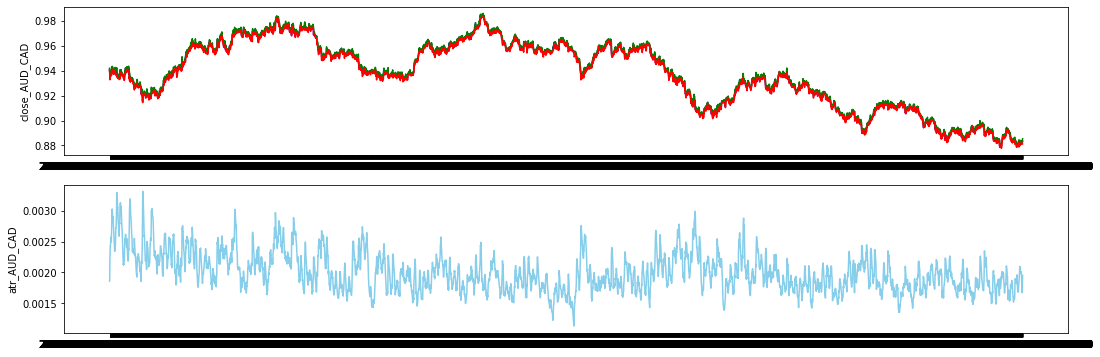

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(2, 1, 1)
sns.lineplot(data=df['close_AUD_CAD'], color='b')
sns.lineplot(data=df['high_AUD_CAD'], color='g')
sns.lineplot(data=df['low_AUD_CAD'], color='r');
plt.subplot(2, 1, 2)
sns.lineplot(data=df['atr_AUD_CAD'], color='skyblue');

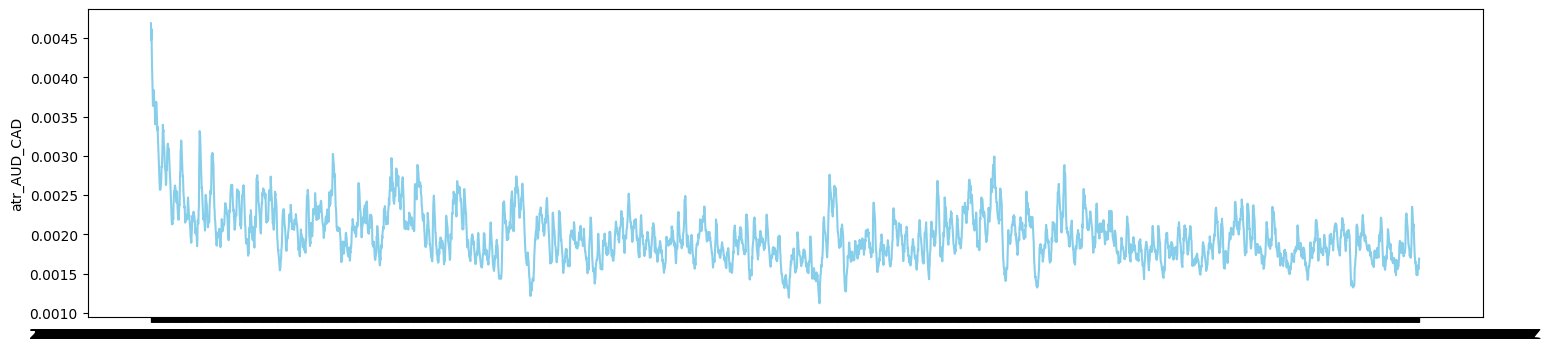

In [9]:
plt.figure(figsize=(18,4))
sns.lineplot(data=df['atr_AUD_CAD'], color='skyblue');